**2nd Assignment - Pengolahan Citra Digital** <br>
**Farsya Nabila Tori [24/543855/PA/23113]**

##Image Enhancement


Langkah ini dilakukan agar diperoleh kualitas gambar yang bagus sehingga memudahkan proses ekstraksi informasi dari citra. Terdapat setidaknya dua jenis *image enhancement*, yakni <br>  **(1) Pixel-Based Enhancement**: berfokus
pada satu pixel tunggal sehingga pixel baru bergantung pada pixel asli di lokasi yang sama dan mengubah distribusi intensitas secara global. Contoh: image negative, log transform, dan histogram equalization. <br> **(2) Filtering-Based Enhancement:** befokus pada kelompok pixel tetangga *(neighborhood)* sehingga pixel baru bergantung pada pixel asli dan pixel sekitarnya dan mengubah detail frekuensi. Contoh: averaging, unsharped masking, dan laplacian filter. <br> <br> Kali ini akan diimplementasikan image enhancement pada gambar-gambar yang blur, gelap, terang, kontras rendah, dan *noise salt and pepper.*

### Blurred Image


Pada gambar blur atau kabur, digunakan filtering-based enhancement dengan metode unsharp masking karena fungsinya untuk mempertajam citra *(sharpening)* secara praktis. Gambar yang digunakan adalah sebagai berikut. <br> <br> ![Gambar Kabur Original](https://drive.google.com/uc?id=1LaHX5uKeANAQ2gk7W2brsQ1_bl0zX3S2)

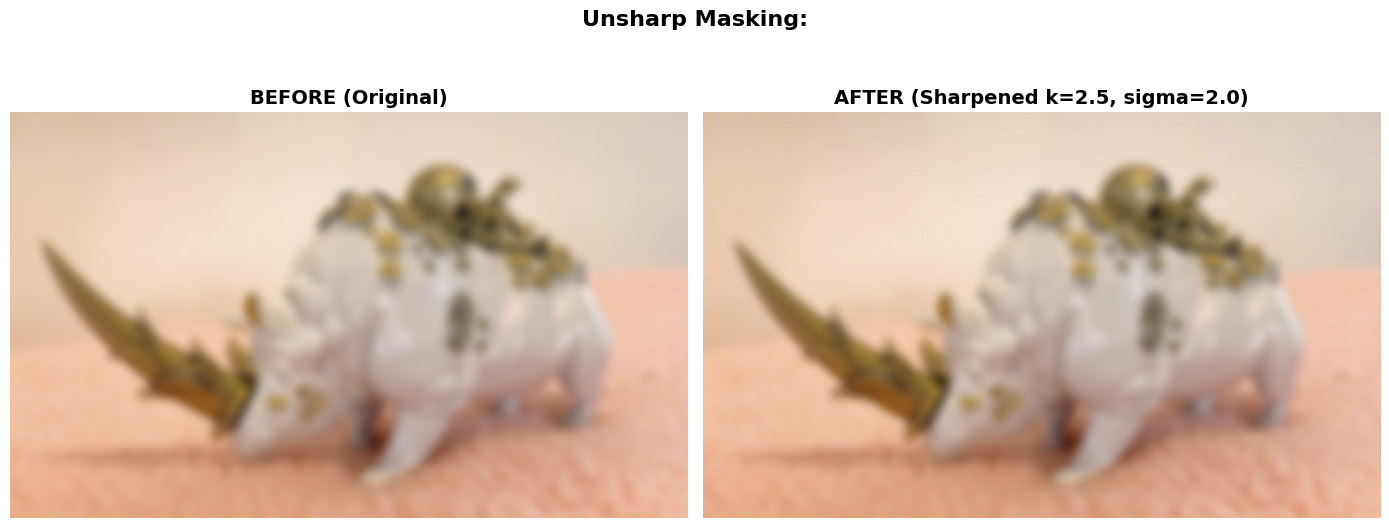

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

image_url = 'https://drive.google.com/uc?id=1LaHX5uKeANAQ2gk7W2brsQ1_bl0zX3S2'

def url_to_image(url):
    try:
        resp = requests.get(url, stream=True).raw
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        img = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if img is None:
            raise ValueError("Gagal memuat atau mendekode gambar.")
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except Exception:
        return None

img_rgb = url_to_image(image_url)

if img_rgb is not None:
    AMOUNT = 2.5
    SIGMA = 2.0
    KERNEL_SIZE = (5, 5)

    def unsharp_mask(image, kernel_size, sigma, amount):
        img_float = np.float32(image)
        blurred_float = cv2.GaussianBlur(img_float, kernel_size, sigma)
        detail_float = cv2.subtract(img_float, blurred_float)
        sharpened_float = cv2.addWeighted(img_float, 1.0, detail_float, amount, 0)
        sharpened_img = np.uint8(np.clip(sharpened_float, 0, 255))
        blurred_img = np.uint8(np.clip(blurred_float, 0, 255))

        return sharpened_img, blurred_img, detail_float

    sharpened_img, blurred_img, detail_img = unsharp_mask(
        img_rgb,
        kernel_size=KERNEL_SIZE,
        sigma=SIGMA,
        amount=AMOUNT
    )

    fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6))

    axes2[0].imshow(img_rgb)
    axes2[0].set_title('BEFORE (Original)', fontsize=14, fontweight='bold')
    axes2[0].axis('off')

    axes2[1].imshow(sharpened_img)
    axes2[1].set_title(f'AFTER (Sharpened k={AMOUNT}, sigma={SIGMA})', fontsize=14, fontweight='bold')
    axes2[1].axis('off')

    plt.suptitle('Unsharp Masking:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

#### Hasil Analisis

Apabila dilihat secara sekilas, perbedaan antara kedua gambar (before vs. after) tidak terlihat signifikan. Namun, apabila diperhatikan secara lebih saksama, didapati bahwa citra hasil unsharped masked menghasilkan gambar yang lebih jernih, lebih kontras yang ditandai dengan sedikit lebih tajamnya tepi garis objek dan begitu juga perubahan warnanya secara keseluruhan. <br> <br> Berdasarkan buku *Digital Image Processing, 4th Ed., Gonzalez & Woods,* pemulihan kontras tepi tidak dapat berjalan secara efektif apabila ada indikasi kuat bahwa terdapat degradasi citra atau blur yang parah. Unsharped Masking adalah filter linear yang bekerja dengan rumus (f+k(f-1)). Untuk pemulihan parah, disarankan untuk mencoba metode yang lebih kompleks, seperti *deconvolution* lanjutan. <br> Referensi: https://www.cl72.org/090imagePLib/books/Gonzales,Woods-Digital.Image.Processing.4th.Edition.pdf

###Dark Image

Untuk gambar yang gelap, digunakan metode untuk mencerahkan atau memperbaiki distribusi kecerahan pada gambar gelap, yakni pixel-based enhancement berupa histogram equalization. Gambar yang digunakan adalah sebagai berikut. <br> <br> ![dark pict](https://drive.google.com/uc?id=1wJbyEq05o-YtVWGVBkT6wxrrsaP3ebh1) <br> <br>

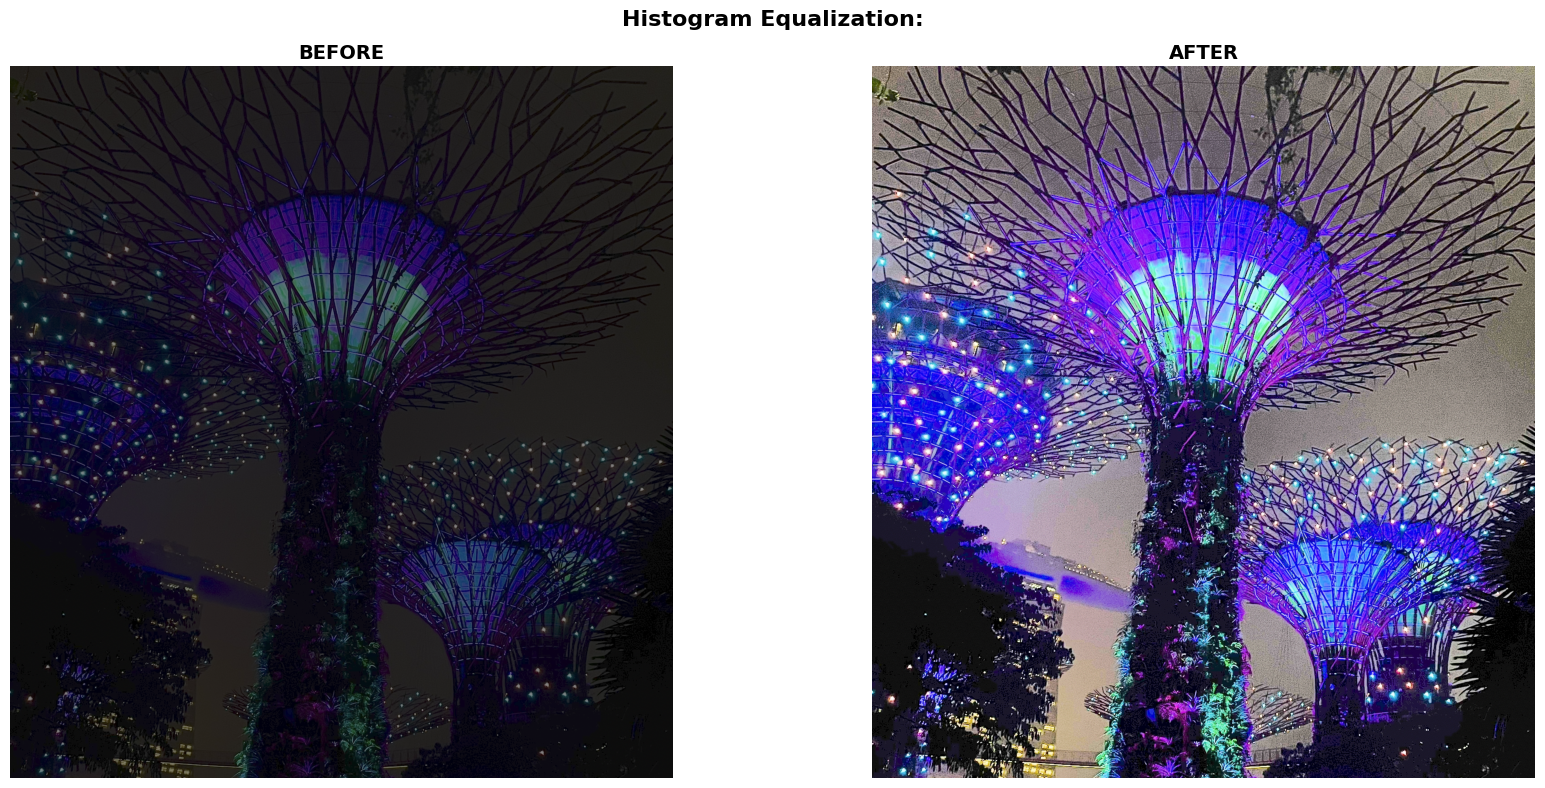

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

image_url = 'https://drive.google.com/uc?id=1wJbyEq05o-YtVWGVBkT6wxrrsaP3ebh1'

def url_to_image(url):
    try:
        resp = requests.get(url, stream=True).raw
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        img = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if img is None:
            raise ValueError("Gagal memuat atau mendekode gambar.")
        return img
    except Exception:
        return None

original_color = url_to_image(image_url)

if original_color is not None:
    img_hsv = cv2.cvtColor(original_color, cv2.COLOR_BGR2HSV)

    H, S, V = cv2.split(img_hsv)
    V_equalized = cv2.equalizeHist(V)
    img_equalized_hsv = cv2.merge([H, S, V_equalized])

    equalized_color = cv2.cvtColor(img_equalized_hsv, cv2.COLOR_HSV2BGR)
    equalized_rgb = cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB)
    original_rgb = cv2.cvtColor(original_color, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    axes[0].imshow(original_rgb)
    axes[0].set_title('BEFORE', fontsize=14, fontweight='bold')
    axes[0].axis('off')

    axes[1].imshow(equalized_rgb)
    axes[1].set_title('AFTER', fontsize=14, fontweight='bold')
    axes[1].axis('off')

    plt.suptitle('Histogram Equalization:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

####Hasil Analisis


Sangat jelas bahwa metode Histogram Equalization (HE) menunjukkan *enhancement* yang signifikan dan memuaskan sebab berhasil mengatasi *underexposure* (kegelapan) pada gambar. Pada prinsipnya, HE menyebarkan piksel yang terkumpul di area gelap ke seluruh rentang 0-255 sehingga gambar terlihat lebih cerah dan intensitasnya lebih merata. Selain itu, peningkatan kontras di area gelap memungkinkan detail pada tekstur terlihat lebih jelas. <br> <br> Pemrosesan hanya pada channel (Value) dari HSV (Hue, Saturation, Value) yang mewakili intensitas atau kecerahan citra, mencegah *shifting* warna yang drastis sehingga menjaga warna asli tetap akurat. Atau dalam kata lain, nilai hue dan saturation dari setiap piksel tidak tersentuh oleh HE. <br> Referensi: https://docs.opencv.org/4.x/d4/d1b/tutorial_histogram_equalization.html <br> <br> Selain itu, berikut ditampilkan perbandingan histogram antara citra sebelum dan sesudah *enhancement*. Diperhatikan bahwa pada sebelum *enhancement*, puncaknya terlihat terkumpul di sisi kiri yang artinya gambar berintensitas rendah. Sementara, histogram yang lainnya terlihat tersebar jauh lebih merata mencerminkan distribusi yang lebih baik.

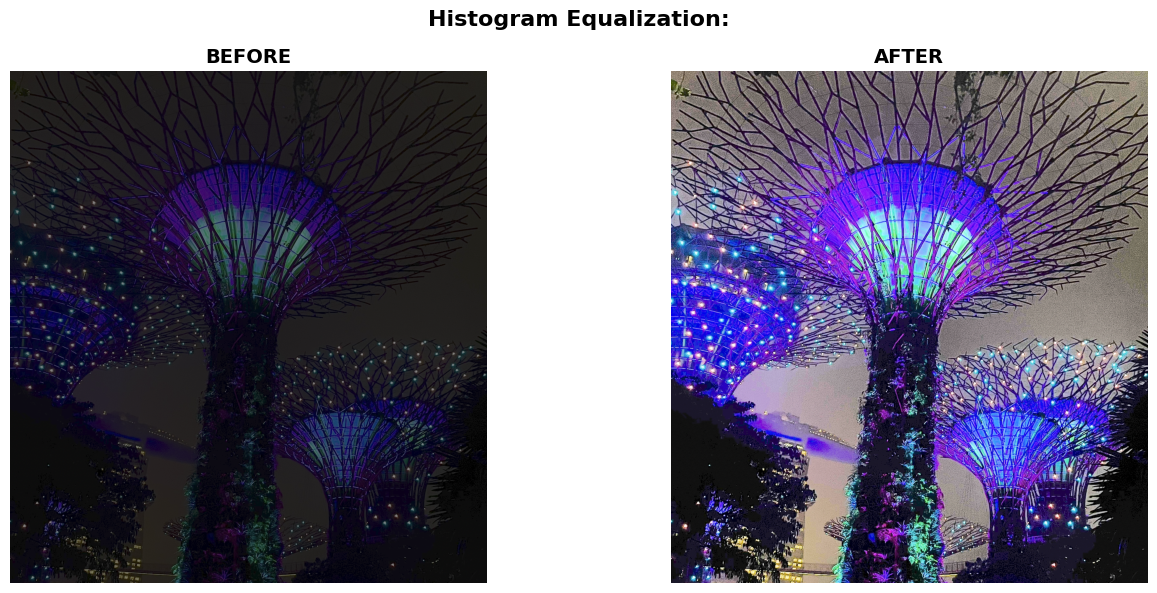

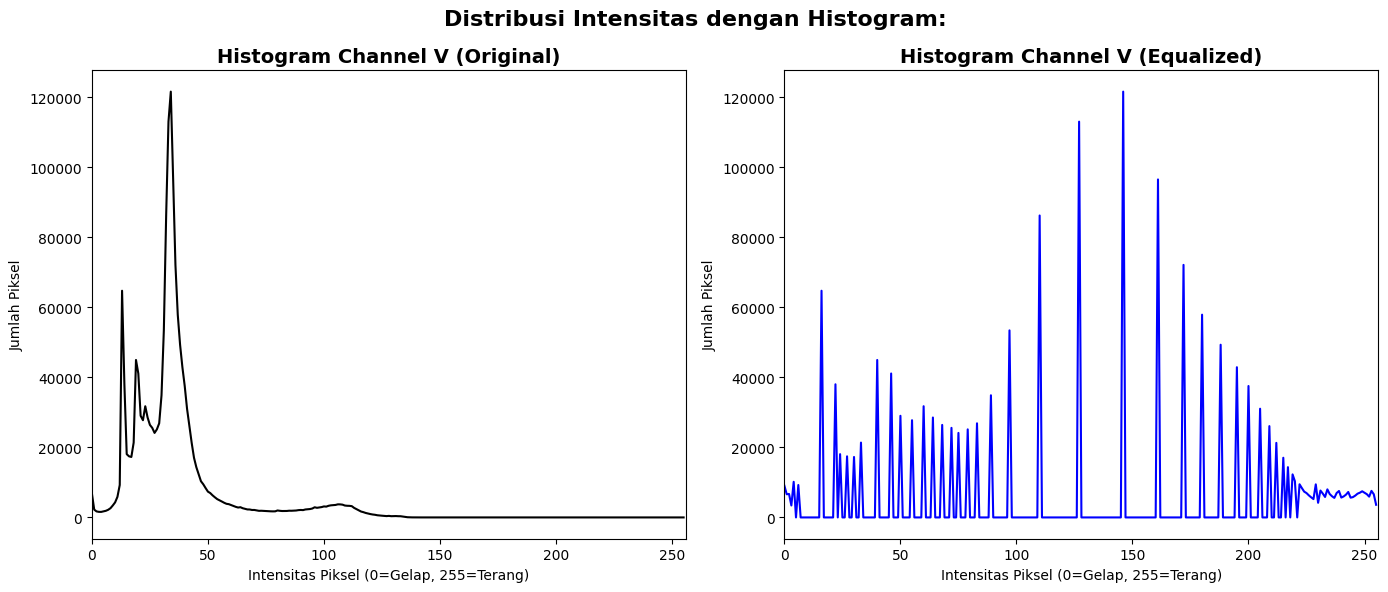

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

image_url = 'https://drive.google.com/uc?id=1wJbyEq05o-YtVWGVBkT6wxrrsaP3ebh1'

def url_to_image(url):
    try:
        resp = requests.get(url, stream=True).raw
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        img = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if img is None:
            raise ValueError("Gagal memuat atau mendekode gambar.")
        return img
    except Exception:
        return None

original_color = url_to_image(image_url)

if original_color is not None:
    img_hsv = cv2.cvtColor(original_color, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img_hsv)
    V_equalized = cv2.equalizeHist(V)
    img_equalized_hsv = cv2.merge([H, S, V_equalized])
    equalized_color = cv2.cvtColor(img_equalized_hsv, cv2.COLOR_HSV2BGR)
    equalized_rgb = cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB)
    original_rgb = cv2.cvtColor(original_color, cv2.COLOR_BGR2RGB)

    fig1, axes1 = plt.subplots(1, 2, figsize=(14, 6))
    axes1[0].imshow(original_rgb)
    axes1[0].set_title('BEFORE', fontsize=14, fontweight='bold')
    axes1[0].axis('off')

    axes1[1].imshow(equalized_rgb)
    axes1[1].set_title('AFTER', fontsize=14, fontweight='bold')
    axes1[1].axis('off')

    plt.suptitle('Histogram Equalization:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    hist_original = cv2.calcHist([V], [0], None, [256], [0, 256])
    hist_equalized = cv2.calcHist([V_equalized], [0], None, [256], [0, 256])

    fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6))

    axes2[0].plot(hist_original, color='black')
    axes2[0].set_title('Histogram Channel V (Original)', fontsize=14, fontweight='bold')
    axes2[0].set_xlabel('Intensitas Piksel (0=Gelap, 255=Terang)')
    axes2[0].set_ylabel('Jumlah Piksel')
    axes2[0].set_xlim([0, 256])

    axes2[1].plot(hist_equalized, color='blue')
    axes2[1].set_title('Histogram Channel V (Equalized)', fontsize=14, fontweight='bold')
    axes2[1].set_xlabel('Intensitas Piksel (0=Gelap, 255=Terang)')
    axes2[1].set_ylabel('Jumlah Piksel')
    axes2[1].set_xlim([0, 256])

    plt.suptitle('Distribusi Intensitas dengan Histogram:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

###Bright Image

Untuk gambar yang terlalu terang (overexposed), metode yang tepat untuk digunakan juga adalah histogram equalization karena alasan yang sama, yakni kemampuannya mendistribusikan rentang piksel ke batas yang lebih terdistribusi, alih-alih memuncak di sebelah kanan apabila dilihat di histogram nantinya. <br> <br> ![bright pict](https://drive.google.com/uc?id=1oACjI4K3PONFFvERHRqHJ8huFFG3vA7j)

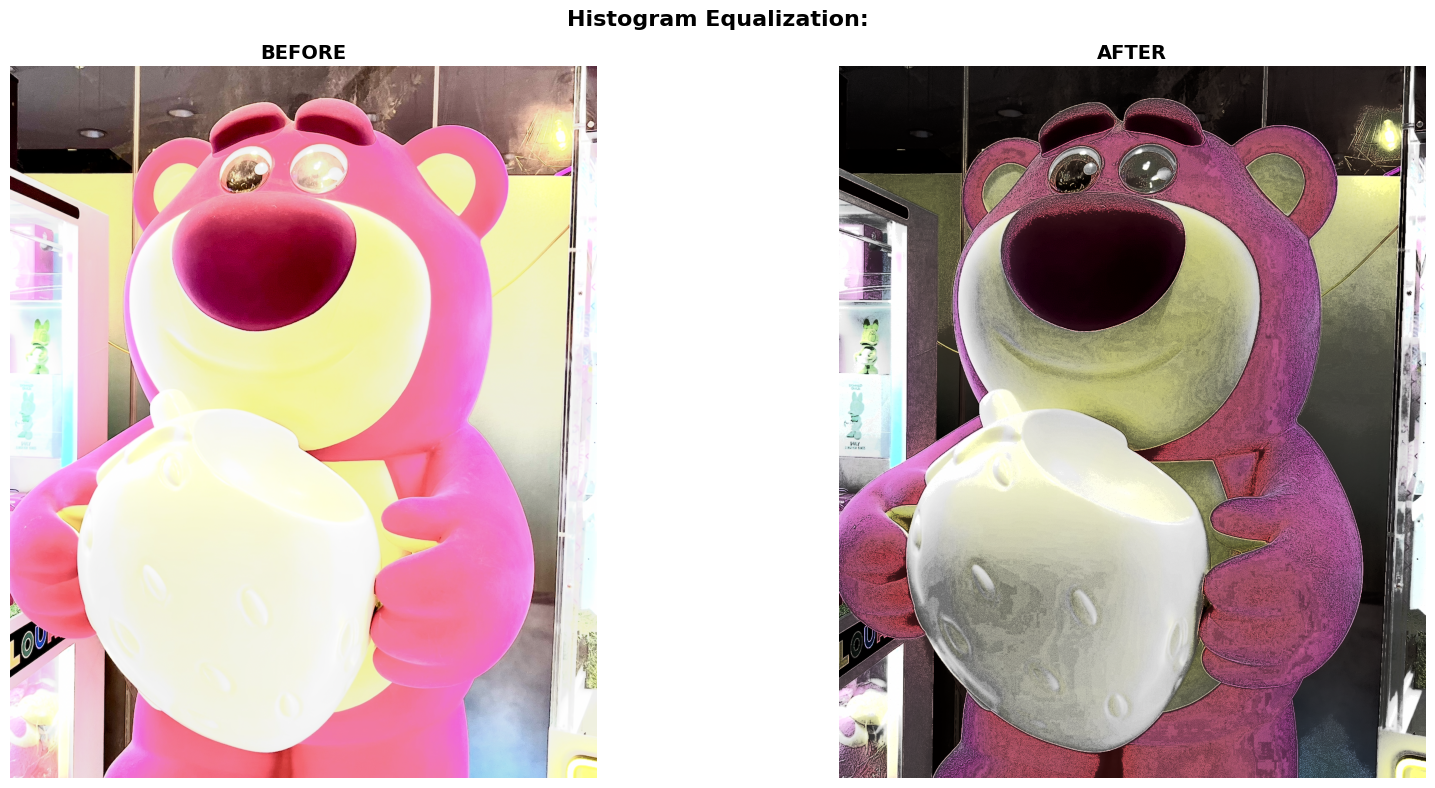

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

image_url = 'https://drive.google.com/uc?id=1oACjI4K3PONFFvERHRqHJ8huFFG3vA7j'

def url_to_image(url):
    try:
        resp = requests.get(url, stream=True).raw
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        img = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if img is None:
            raise ValueError("Gagal memuat atau mendekode gambar.")
        return img
    except Exception:
        return None

original_color = url_to_image(image_url)

if original_color is not None:
    img_hsv = cv2.cvtColor(original_color, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img_hsv)
    V_equalized = cv2.equalizeHist(V)

    img_equalized_hsv = cv2.merge([H, S, V_equalized])
    equalized_color = cv2.cvtColor(img_equalized_hsv, cv2.COLOR_HSV2BGR)
    equalized_rgb = cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB)
    original_rgb = cv2.cvtColor(original_color, cv2.COLOR_BGR2RGB)

    fig1, axes1 = plt.subplots(1, 2, figsize=(18, 8))

    axes1[0].imshow(original_rgb)
    axes1[0].set_title('BEFORE', fontsize=14, fontweight='bold')
    axes1[0].axis('off')

    axes1[1].imshow(equalized_rgb)
    axes1[1].set_title('AFTER', fontsize=14, fontweight='bold')
    axes1[1].axis('off')

    plt.suptitle('Histogram Equalization:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

####Hasil Analisis

Berdasarkan hasil tersebut, dapat dibuktikan bahwa HE juga berhasil mengatasi citra yang terlalu cerah tersebut sebab kini terlihat lebih jelas, terutama tepi garis pada objek. Namun, hasilnya justru terlihat lebih gelap dan sedikit suram dibandingkan original sebab banyak piksel dipetakan ke intensitas yang lebih rendah (lebih dekat ke hitam). <br> <br> Untuk mengatasi hal ini, direkomendasikan metode Power-Law (Gamma) Transformation yang mampu menyesuaikan penggelapan secara lebih mulus tanpa mengganggu hubungan antarpiksel secara drastis. Dengan HE, area histogram di mana piksel menumpuk diregangkan sehingga memungkinkan *noise* ikut dikuatkan atau citra terlihat telalu kontras. <br> Referensi: https://www.cl72.org/090imagePLib/books/Gonzales,Woods-Digital.Image.Processing.4th.Edition.pdf <br> <br> Berikut ditampikan visualisasi histogram sebelum dan sesudah *enhancement* untuk metode HE yang diterapkan pada gambar.

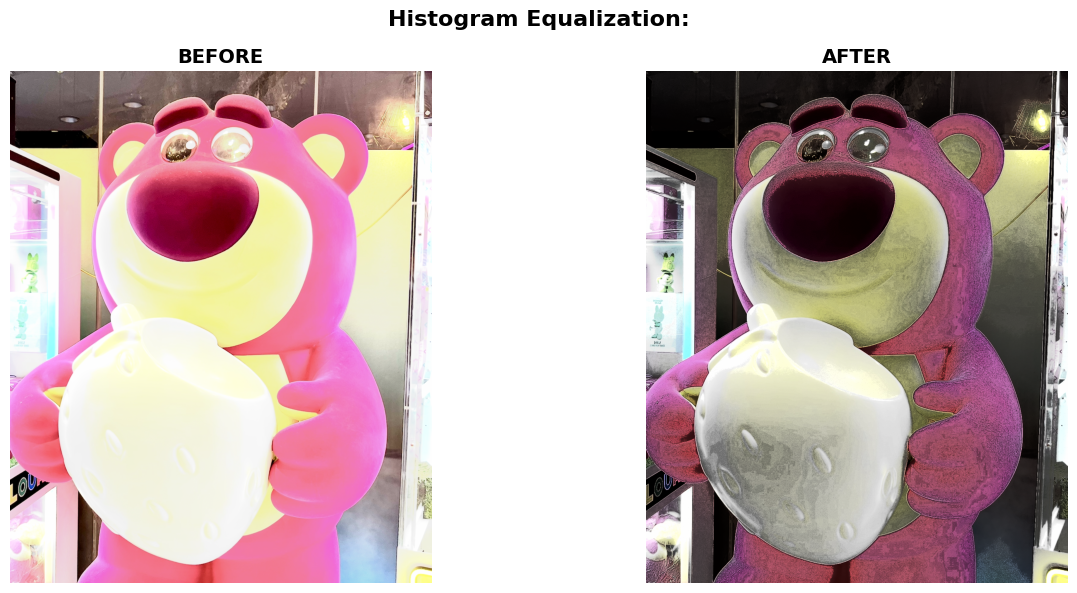

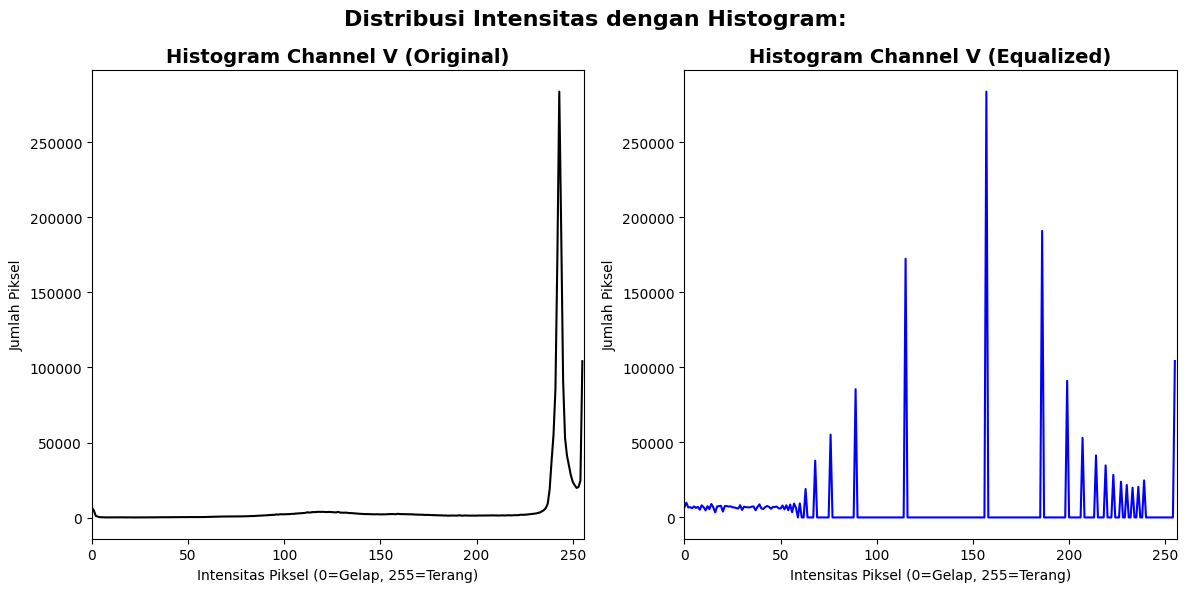

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

image_url = 'https://drive.google.com/uc?id=1oACjI4K3PONFFvERHRqHJ8huFFG3vA7j'

def url_to_image(url):
    try:
        resp = requests.get(url, stream=True).raw
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        img = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if img is None:
            raise ValueError("Gagal memuat atau mendekode gambar.")
        return img
    except Exception:
        return None

original_color = url_to_image(image_url)

if original_color is not None:
    img_hsv = cv2.cvtColor(original_color, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img_hsv)
    V_equalized = cv2.equalizeHist(V)

    img_equalized_hsv = cv2.merge([H, S, V_equalized])
    equalized_color = cv2.cvtColor(img_equalized_hsv, cv2.COLOR_HSV2BGR)
    equalized_rgb = cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB)
    original_rgb = cv2.cvtColor(original_color, cv2.COLOR_BGR2RGB)

    fig1, axes1 = plt.subplots(1, 2, figsize=(14, 6))

    axes1[0].imshow(original_rgb)
    axes1[0].set_title('BEFORE', fontsize=14, fontweight='bold')
    axes1[0].axis('off')

    axes1[1].imshow(equalized_rgb)
    axes1[1].set_title('AFTER', fontsize=14, fontweight='bold')
    axes1[1].axis('off')

    plt.suptitle('Histogram Equalization:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    hist_original = cv2.calcHist([V], [0], None, [256], [0, 256])
    hist_equalized = cv2.calcHist([V_equalized], [0], None, [256], [0, 256])

    fig2, axes2 = plt.subplots(1, 2, figsize=(12, 6))
    axes2[0].plot(hist_original, color='black')
    axes2[0].set_title('Histogram Channel V (Original)', fontsize=14, fontweight='bold')
    axes2[0].set_xlabel('Intensitas Piksel (0=Gelap, 255=Terang)')
    axes2[0].set_ylabel('Jumlah Piksel')
    axes2[0].set_xlim([0, 256])

    axes2[1].plot(hist_equalized, color='blue')
    axes2[1].set_title('Histogram Channel V (Equalized)', fontsize=14, fontweight='bold')
    axes2[1].set_xlabel('Intensitas Piksel (0=Gelap, 255=Terang)')
    axes2[1].set_ylabel('Jumlah Piksel')
    axes2[1].set_xlim([0, 256])

    plt.suptitle('Distribusi Intensitas dengan Histogram:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

###Low-Contrast Image

Untuk citra kontras rendah, diimplementasikan metode Piece-wise Linear Transformation berupa Contrast Stretching karena secara eksplist, nilai-nilai piksel yang terkumpul di area abu-abu diregangkan ke seluruh rentang 0-255. Gambar yang digunakan adalah sebagai berikut. <br> <br> ![cons pict](https://drive.google.com/uc?id=1CSF6MQyirE7kmU15j6tPb1UhxQ4IgqA-)

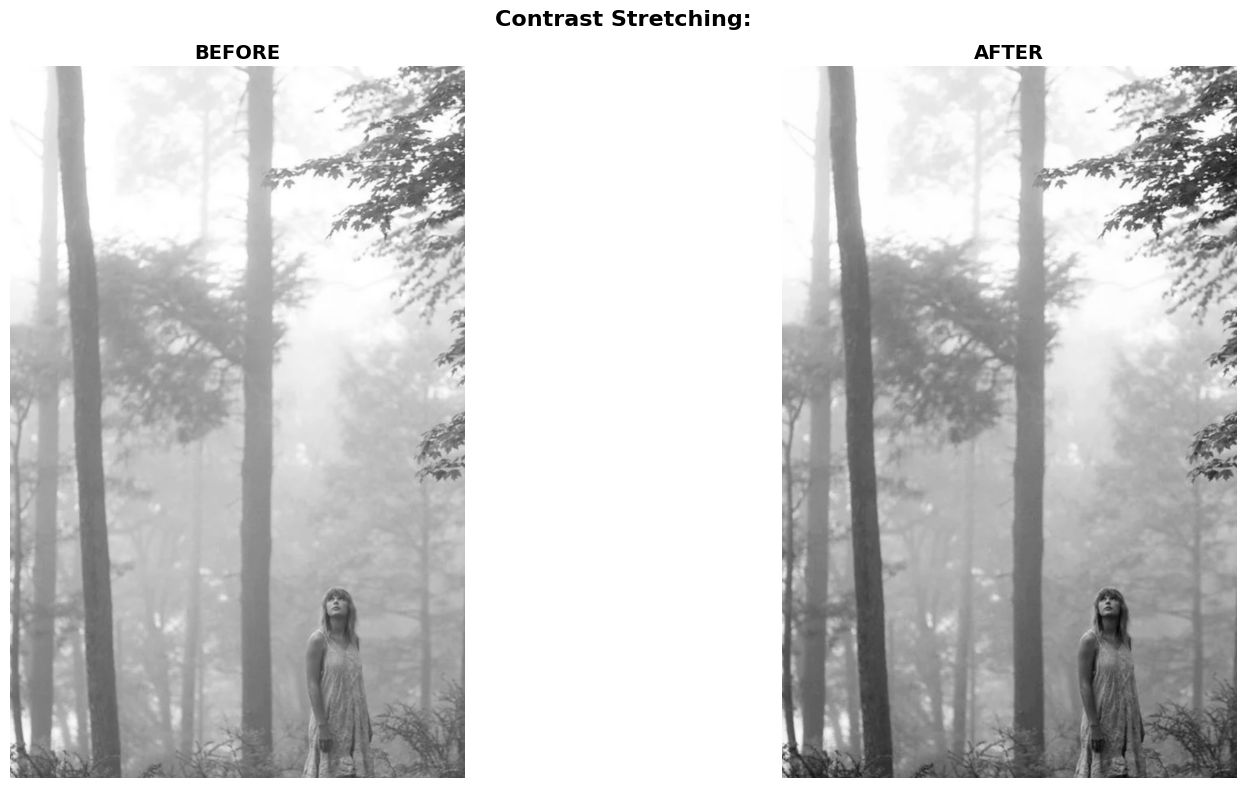

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

image_url = 'https://drive.google.com/uc?id=1CSF6MQyirE7kmU15j6tPb1UhxQ4IgqA-'

def url_to_image(url):
    try:
        resp = requests.get(url, stream=True).raw
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        img = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if img is None:
            raise ValueError("Gagal memuat atau mendekode gambar.")
        return img
    except Exception as e:
        print(f"Error memuat gambar: {e}")
        return None

original_color = url_to_image(image_url)

if original_color is not None:

    img_hsv = cv2.cvtColor(original_color, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img_hsv)

    R1 = V.min()
    R2 = V.max()
    S1 = 0
    S2 = 255

    if R2 - R1 == 0:
        stretched_V = V.copy()
    else:
        stretched_V = ((S2 - S1) / (R2 - R1)) * (V.astype(np.float32) - R1) + S1
        stretched_V = np.clip(stretched_V, 0, 255).astype(np.uint8)

    img_stretched_hsv = cv2.merge([H, S, stretched_V])
    stretched_color = cv2.cvtColor(img_stretched_hsv, cv2.COLOR_HSV2BGR)
    stretched_rgb = cv2.cvtColor(stretched_color, cv2.COLOR_BGR2RGB)
    original_rgb = cv2.cvtColor(original_color, cv2.COLOR_BGR2RGB)

    fig1, axes1 = plt.subplots(1, 2, figsize=(18, 8))

    axes1[0].imshow(original_rgb)
    axes1[0].set_title('BEFORE', fontsize=14, fontweight='bold')
    axes1[0].axis('off')

    axes1[1].imshow(stretched_rgb)
    axes1[1].set_title('AFTER', fontsize=14, fontweight='bold')
    axes1[1].axis('off')

    plt.suptitle('Contrast Stretching:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

####Hasil Analisis

Hasilnya menunjukkan bahwa contrast strecthing bekerja dengan sangat efektif untuk mengatasi masalah pada citra low-contrast ini dengan mempertahankan tampilan yang terkontrol. Sebab kini, gambarnya lebih hitam pekat dan putih terang dibanding sebelumnya yang berwarna abu-abu. Selain itu, detail pada warna kulit manusia, batang, semak-semak muncul lebih jelas. <br> <br> Contrast Stretching termasuk piece-wise linear transformation karena ia beroperasi menggunakan persamaan garis lurus. Dengan proses linier ini, tidak ada nilai piksel yang terpotong atau distorsi yang tidak terduga, melainkan hanya peregangan proporsional dari rentang intensitas.

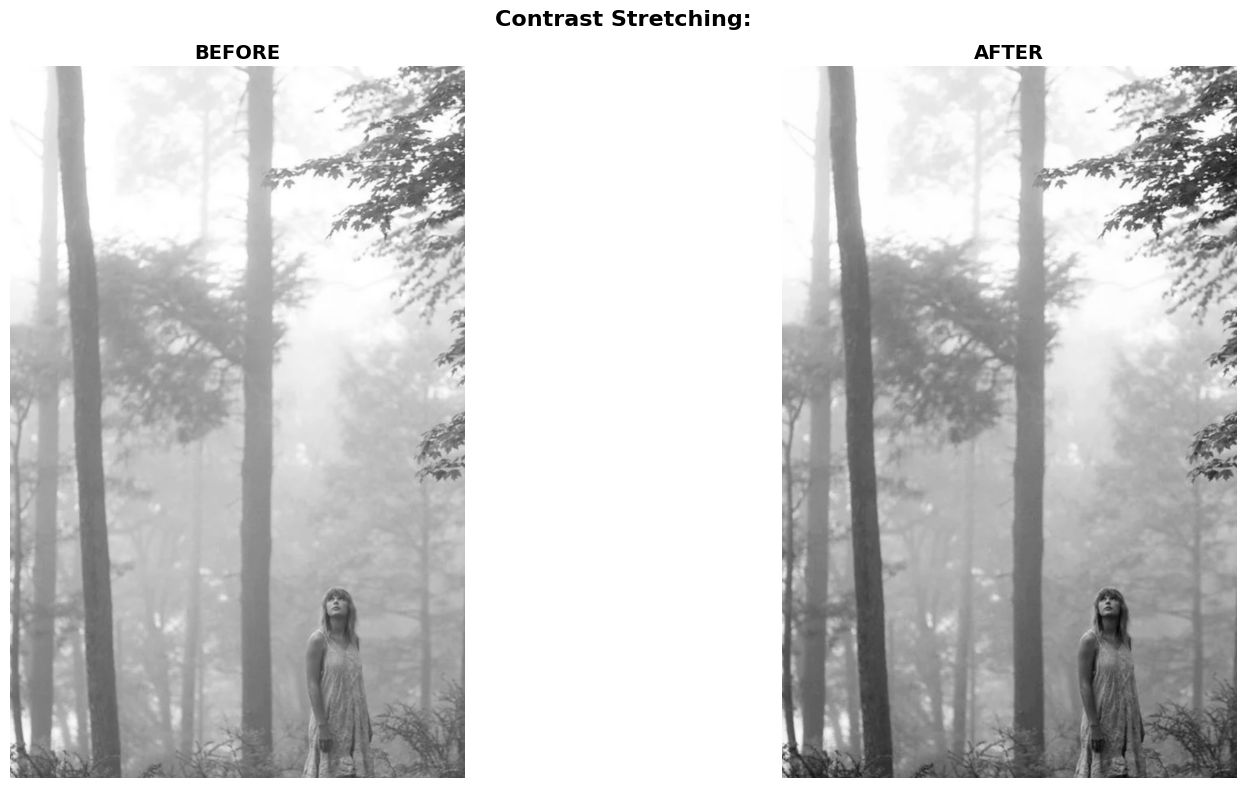

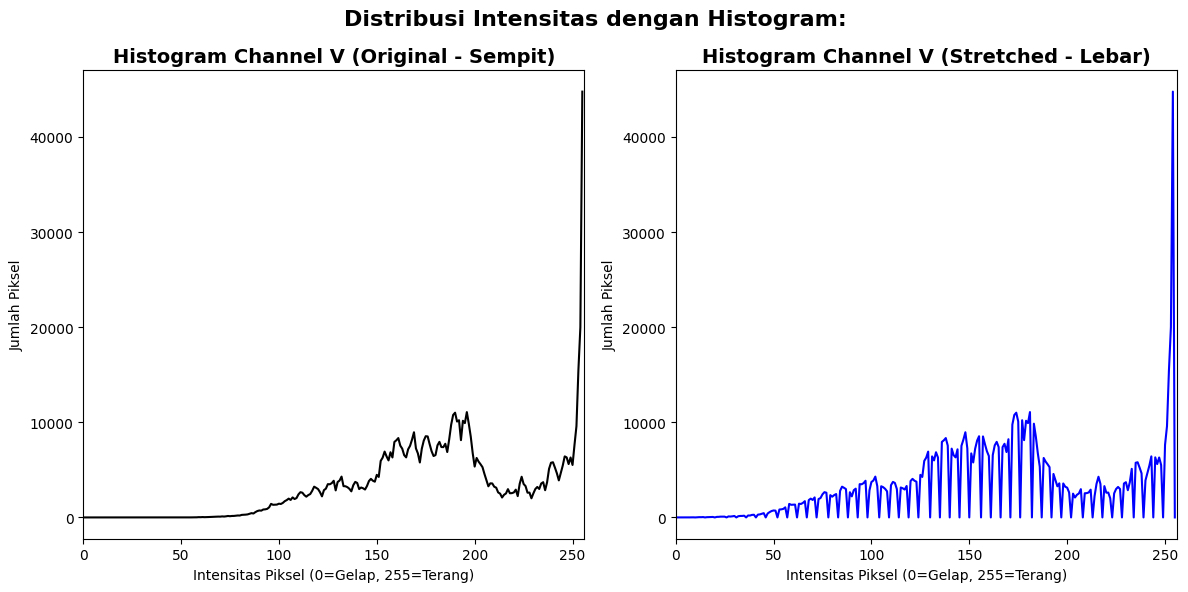

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

image_url = 'https://drive.google.com/uc?id=1CSF6MQyirE7kmU15j6tPb1UhxQ4IgqA-'

def url_to_image(url):
    try:
        resp = requests.get(url, stream=True).raw
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        img = cv2.imdecode(image, cv2.IMREAD_COLOR)
        if img is None:
            raise ValueError("Gagal memuat atau mendekode gambar.")
        return img
    except Exception as e:
        print(f"Error memuat gambar: {e}")
        return None

original_color = url_to_image(image_url)

if original_color is not None:

    img_hsv = cv2.cvtColor(original_color, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img_hsv)

    R1 = V.min()
    R2 = V.max()
    S1 = 0
    S2 = 255

    if R2 - R1 == 0:
        stretched_V = V.copy()
    else:
        stretched_V = ((S2 - S1) / (R2 - R1)) * (V.astype(np.float32) - R1) + S1
        stretched_V = np.clip(stretched_V, 0, 255).astype(np.uint8)

    img_stretched_hsv = cv2.merge([H, S, stretched_V])
    stretched_color = cv2.cvtColor(img_stretched_hsv, cv2.COLOR_HSV2BGR)
    stretched_rgb = cv2.cvtColor(stretched_color, cv2.COLOR_BGR2RGB)
    original_rgb = cv2.cvtColor(original_color, cv2.COLOR_BGR2RGB)

    fig1, axes1 = plt.subplots(1, 2, figsize=(18, 8))

    axes1[0].imshow(original_rgb)
    axes1[0].set_title('BEFORE', fontsize=14, fontweight='bold')
    axes1[0].axis('off')

    axes1[1].imshow(stretched_rgb)
    axes1[1].set_title('AFTER', fontsize=14, fontweight='bold')
    axes1[1].axis('off')

    plt.suptitle('Contrast Stretching:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    hist_original = cv2.calcHist([V], [0], None, [256], [0, 256])
    hist_stretched = cv2.calcHist([stretched_V], [0], None, [256], [0, 256])

    fig2, axes2 = plt.subplots(1, 2, figsize=(12, 6))

    axes2[0].plot(hist_original, color='black')
    axes2[0].set_title('Histogram Channel V (Original - Sempit)', fontsize=14, fontweight='bold')
    axes2[0].set_xlabel('Intensitas Piksel (0=Gelap, 255=Terang)')
    axes2[0].set_ylabel('Jumlah Piksel')
    axes2[0].set_xlim([0, 256])

    axes2[1].plot(hist_stretched, color='blue')
    axes2[1].set_title('Histogram Channel V (Stretched - Lebar)', fontsize=14, fontweight='bold')
    axes2[1].set_xlabel('Intensitas Piksel (0=Gelap, 255=Terang)')
    axes2[1].set_ylabel('Jumlah Piksel')
    axes2[1].set_xlim([0, 256])

    plt.suptitle('Distribusi Intensitas dengan Histogram:', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()